# Test the two-line CLEDB inversion on synthetic data.

In [1]:
## the script version "test_2line.py" is generated by exporting this notebook via file -> export as -> executable script.
## Do not directly edit that version!

In [1]:
## Inversion Constants and control parameter imports.
## symbolic links pointing to the root directory containing the files are used. Pythondoes not allow relative upstream references anymore
import constants as consts
import ctrlparams
params=ctrlparams.ctrlparams()    ##Initialize and use a shorter label

## Needed modules
import pickle                ## CLE synthetic observation data cube is saved in the pickle format.
import importlib             ## reloads imports (python default settings will not reload small changes).
import numpy as np           ## Defines variables to store/load headers

from numba.typed import List ## Most numba functions are loaded by the CLEDB modules; non-reflected lists are needed to create a list of 2 observation arrays

### 1. Import the Fe XIII 1074 and 1079 nm synthetic CLE/MURAM or observed CoMP data

#### 1.a CLE 3dipole along LOS simulation example

In [2]:
## observations of a 3 dipole coronal structure of a Fe XIII combined observation
## sobs1-3 are the independent dipoles
## sobsa is the combined 3 dipole output
## waveA and waveB are the wavelength arrays for the two Fe XIII lines

# with open('obsstokes_3dipole_hires_fullspectra.pkl','rb') as f:
#     sobs1,sobs2,sobs3,sobsa,waveA,waveB = pickle.load(f)  
# ### reversing of the wavelength range. THIS IS NEEDED! CLE writes frequency-wise, so wavelengths are reversed in the original datacubes!!!!!!
# sobsa=sobsa[:,:,::-1,:]

# ## A fake minimal header for CLE
# ## This assumes the reference pixel is in the left bottom of the array; the values are in solar coordinates at crpixn in r_sun. The wavelength raferences (vacuum), ranges and spectral resolutions are unique. See CLE outfiles and grid.dat.
# head_in =  [np.array((0, 0, np.int32(sobsa.shape[2]/2)-1,\
#                      -0.75, 0.8, 1074.62686-0.0124,\
#                      (0.75-(-0.75))/sobsa.shape[0], (1.5-0.8)/sobsa.shape[1], 0.0247,"CLE-SIM"),\
#                     dtype = [('crpix1', np.float32), ('crpix2', np.float32), ('crpix3', np.float32),\
#                               ('crval1', np.float32), ('crval2', np.float32),('crval3', np.float32),\
#                               ('cdelt1', np.float32), ('cdelt2', np.float32),('cdelt3', np.float32), ('instrume','U7')]).view(np.recarray),\
#             np.array((0, 0, np.int32(sobsa.shape[2]/2)-1,\
#                      -0.75, 0.8, 1079.78047-0.0124,\
#                      (0.75-(-0.75))/sobsa.shape[0], (1.5-0.8)/sobsa.shape[1], 0.0249,"CLE-SIM"),\
#                     dtype = [('crpix1', np.float32), ('crpix2', np.float32), ('crpix3', np.float32),\
#                               ('crval1', np.float32), ('crval2', np.float32),('crval3', np.float32),\
#                               ('cdelt1', np.float32), ('cdelt2', np.float32),('cdelt3', np.float32), ('instrume', 'U7')]).view(np.recarray)  ]
 
#waveA=waveA[::-1]         ##the wave arrays are not needed by the inversion. the information is reconstructed from keywords
#waveB=waveB[::-1]

#### 1.b CLE sheets along LOS example loading

In [3]:
## observations of sheetlos coronal structure of a Fe XIII combined observation
## sobsa is the combined 5 dipole output
## waveA and waveB are the wavelength arrays for the two Fe XIII lines

# with open('obsstokes_sheetslos_hires_fullspectra.pkl','rb') as f:
#    sobsa,waveA,waveB = pickle.load(f)  
### reversing of the wavelength range. THIS IS NEEDED! CLE writes frequency-wise, so wavelengths are reversed in the original datacubes!!!!!!
# sobsa=sobsa[:,:,::-1,:]

# ## A fake minimal header for CLE
# ## This assumes the reference pixel is in the left bottom of the array; the values are in solar coordinates at crpixn in r_sun. The wavelength raferences (vacuum), ranges and spectral resolutions are unique. See CLE outfiles and grid.dat.
# head_in =  TBD


# waveA=waveA[::-1]         ##the wave arrays are not needed by the inversion. the information is reconstructed from keywords
# waveB=waveB[::-1]

## not yet included as test data. Coming soon!

#### 1.c MURAM data example loading

In [4]:
# ## load the fake observation muram data.             
# ## FE XIII 1074+1079

# with open('obsstokes_avg_muram3.pkl','rb') as f:
#     sobsa = pickle.load(f) 
# sobsa=sobsa[0]  

# ## A fake minimal header for MURAM
# ## This assumes the reference pixel is in the left bottom of the array; the values are in solar coordinates at crpixn in r_sun (from muram xvec and yvec arrays). The wavelength raferences (vacuum), ranges and spectral resolutions are unique (muram wvvec1 and wvvce2 arrays).
# head_in =  [np.array((0, 0, 0,\
#                      -0.071, 0.989, 1074.257137,\
#                      0.0001379,  0.0000689, 0.0071641,"MUR-SIM" ),\
#                     dtype = [('crpix1', np.float32), ('crpix2', np.float32), ('crpix3', np.float32),\
#                               ('crval1', np.float32), ('crval2', np.float32),('crval3', np.float32),\
#                               ('cdelt1', np.float32), ('cdelt2', np.float32),('cdelt3', np.float32), ('instrume','U7')]).view(np.recarray),\
#             np.array((0, 0, 0,\
#                     -0.071, 0.989, 1079.420513,\
#                      0.0001379,  0.0000689, 0.0071985,"MUR-SIM" ),\
#                     dtype = [('crpix1', np.float32), ('crpix2', np.float32), ('crpix3', np.float32),\
#                               ('crval1', np.float32), ('crval2', np.float32),('crval3', np.float32),\
#                               ('cdelt1', np.float32), ('cdelt2', np.float32),('cdelt3', np.float32), ('instrume','U7')]).view(np.recarray)  ]

# ## muram data too big to include as test data!!!!

#### 1.d CoMP data example loading (IQUD required. No stokes V!)

In [5]:
# ## load a sample MLSO CoMP observation.             
# ## FE XIII 1074+1079
# ## We will be using the 20120327 continuum corrected CoMP datacube from http://download.hao.ucar.edu/d5/mlso/pub/comp-continuum-correction/
# ## We will work under the assumption of using MLSO lev 2 data that are already wavelength integrated. 

# ## Practically, in this test case both iqud and integrated parameters need to be set to true.
# if params.integrated == True:                                       
#     with open('obsstokes_CoMP_integrated_20120327.pkl','rb') as f:
#         c1074_iqu,c1079_iqu = pickle.load(f)                         ## These are dictionaries. included keys are queried by c1074_iqu.keys()  

#     head_in = [c1074_iqu['index1'],c1079_iqu['index1']]
    
#     sobsa = np.zeros((head_in[0].naxis1[0],head_in[0].naxis2[0],4),dtype=np.float32) ## sobsa will not have a wavelength point dimension in this case
#     sobsb = np.zeros((head_in[0].naxis1[0],head_in[0].naxis2[0],4),dtype=np.float32)

#     ## This examples uses frames "3" in the c1074_iqu cube and "2"in the c1079_iqu cube which are close temporally for the main matching
# #     sobsa[:,:,0] = c1074_iqu['cube_ii'][3,:,:]                       ## Uses frame 3 - '2012-03-27T18:01:21'
# #     sobsa[:,:,1] = c1074_iqu['cube_q' ][3,:,:]
# #     sobsa[:,:,2] = c1074_iqu['cube_u' ][3,:,:]

# #     sobsb[:,:,0] = c1079_iqu['cube_ii'][2,:,:]                       ## Uses frame 2 - '2012-03-27T18:05:32'
# #     sobsb[:,:,1] = c1079_iqu['cube_q' ][2,:,:]
# #     sobsb[:,:,2] = c1079_iqu['cube_u' ][2,:,:]
    
#     ## If future uCoMP or COSMO data can retrieve Stokes V, an IQUV inversion might become feasible
#     ## Otherwise just leave the Stokes V dimension set to 0
#     # if params.iqud != True:                    
#     #     sobsa[:,:,3] = c1074_iqu['cube_v'][3,:,:]                    ##cube_v does not exist in this test dataset 
#     #     sobsb[:,:,3] = c1079_iqu['cube_v'][3,:,:]    

### 1.e Doppler data loading

In [7]:
# ## Loading of the doppler data. THE ELIF BRANCH IS REQUIRED for Numba compatibility regardless of type of inversion.
# ## The Numba non-python cledb_prepinv implmentation needs static inputs, that forces including sobs_dopp for hypotethically running iqud setups.
# ## In the IQUV case, the array is just set to empty and will not be used downstream.

# if params.integrated == True and params.iqud == True:      
#     with open('obsdopp_CoMP_IQUD_bpos_20120327.pkl','rb') as f:
#         sobs_dopp = np.nan_to_num(pickle.load(f),nan=0)    ## lots of voxels were deemed unmeasurable and are stored as nan. Convert these to 0 for simplicity.  
# elif params.iqud == False:
#     sobs_dopp = np.empty((sobsa.shape[0],sobsa.shape[1],4),dtype=np.float32) 
    
# ## These quantities are computed using the methods and public code presented in Yang et. al, 2020
# ## The array dimensions are: 
# ## 0 - Magnetic field strength via wave plasma speed (see Paraschiv 2023 or Yang et. al, 2020) 
# ## The quantity might alternatively be assumed as correspondent correspondent to B*cos(Theta_B). The applicability of this statement is not yet proved!!
# ## 1 - Wave propagation angle (wpa) resulting from the doppler oscilation analysis. ## - np.pi/2 applied, see below
# ##     (wpa): If using the IDL scripts to compute these quantities, deduct pi/2 to have the same range as 0.5arctan(u/q) which is (-pi/2,pi/2).
# ## 2 - Not currently used - Magnetic azimuth as derived from the ratio of the UQ linear polarization components (Phi_B; also computed in this setup). sobs_dopp[2]=sobs_dopp[0]*np.cos(Phi_B)
# ## 3 - Not currently used - Magnetic azimuth as derived from the wave phase angle(wpa) of propagating doppler waves.                                  sobs_dopp[3]=sobs_dopp[0]*np.cos(sobs_dopp[1])


### 2. Test the CLEDB_PREPINV module with synthetic data. 

##### Remember to set your personal options and database paths in the ctrlparams class (in the parent directory) before continuing.

In [8]:
import CLEDB_PREPINV.CLEDB_PREPINV as prepinv  ##imports from the CLEDB_PREPINV subdirectory

In [9]:
## arrange the two observation "files" in a simple list;
## un-necesary step given the shape of sobs array, but it mimicks a file/header structure.

## We will set a proper numba typed list ## standard python lists will be deprecated as they do not work well with numba
if params.integrated == False:  
    sobs_lst=[sobsa[:,:,:,0:4],sobsa[:,:,:,4:8]]   ## The simulated data is a 8 dimensional array with both lines included.
    # sobs_lst=[sobsa[:,:,:,0:4],sobsb[:,:,:,0:4]]   ## This is a standard input for an actual observation.
else:
    sobs_lst=[sobsa[:,:,0:4],sobsb[:,:,0:4]]       ## only 3 dimensions; no wavelength data for CoMP setup

sobs_in = List()                                   ## this is the List object of numba. It utilizes memory in a column-like fashion.
[sobs_in.append(x) for x in sobs_lst]              ## Numba developers claim that it is a significantly faster performing object

##delete the large arrays from memory
# sobs_lst = 0
# sobsa = 0

[None, None]

##### Preprocess the observation "files".

In [10]:
importlib.reload(prepinv)       ## If module is modified, reload the contents
sobs_tot,yobs,rms,background,keyvals,sobs_totrot,aobs=prepinv.sobs_preprocess(sobs_in,head_in,params)

------------------------------------
----SOBS_PREPROCESS - READ START----
------------------------------------
We are inverting observations of 2 coronal line(s) 
Line 1: Fe XIII 1074.7nm
Line 2: Fe XIII 1079.8nm
------------------------------------
--SOBS_PREPROCESS - READ FINALIZED--
------------------------------------


##### Select and pre-read the database files based on the observation preprocessing. At this point, the database should be generated via CLEDB_BUILD and properly path linked via ctrlparams.

In [11]:
importlib.reload(prepinv)       ## If module is modified, reload the contents
db_enc,database,dbhdr=prepinv.sdb_preprocess(yobs,keyvals,params)  ## Warning, this might be memory consuming; see details in documentation

------------------------------------
----SDB_PREPROCESS - READ START-----
------------------------------------
CLEDB databases cover a span of 51 heights between 1.0 - 1.5 Solar radius
Load DB datafiles for 51  heights in memory for 2 line(s).
------------------------------------
INDIVIDUAL DB file location: /home/noxpara/Documents/physics_prog/cle/db204_R0500_UPDT/fe-xiii_1074/DB0120.DAT
INDIVIDUAL DB file location: /home/noxpara/Documents/physics_prog/cle/db204_R0500_UPDT/fe-xiii_1079/DB0120.DAT
INDIVIDUAL DB file location: /home/noxpara/Documents/physics_prog/cle/db204_R0500_UPDT/fe-xiii_1074/DB0260.DAT
INDIVIDUAL DB file location: /home/noxpara/Documents/physics_prog/cle/db204_R0500_UPDT/fe-xiii_1079/DB0260.DAT
INDIVIDUAL DB file location: /home/noxpara/Documents/physics_prog/cle/db204_R0500_UPDT/fe-xiii_1074/DB0189.DAT
INDIVIDUAL DB file location: /home/noxpara/Documents/physics_prog/cle/db204_R0500_UPDT/fe-xiii_1079/DB0189.DAT
INDIVIDUAL DB file location: /home/noxpara/Documents/

#### At this point all necesary data and required databases are loaded into memory for fast processing.

### 3. Test the CLEDB_PROC module with the same synthetic data.

In [12]:
import CLEDB_PROC.CLEDB_PROC as procinv

##### Process the spectroscopy outputs

In [13]:
importlib.reload(procinv)                                                                ## If module is modified, reload the contents 
specout = procinv.spectro_proc(sobs_in,sobs_tot,rms,background,keyvals,consts,params) 

FATAL! Integrated data for IQUD does not have a wavelength dimension. No spectroscopy products to compute!


##### Process the LOS magnetic fields from the first line

In [14]:
importlib.reload(procinv)       ## If module is modified, reload the contents 
blosout=procinv.blos_proc(sobs_tot,rms,keyvals,consts,params)

FATAL! No Stokes V data available to compute analytical line-of-sight projected magnetic fields.


##### Process the full vector magnetic field inversion products

In [ ]:
## WARNING: This step has a significantly long execution time.
importlib.reload(procinv)       ## If module is modified, reload the contents
invout,sfound=procinv.cledb_invproc(sobs_totrot,sobs_dopp,database,db_enc,yobs,aobs,rms,dbhdr,keyvals,params.nsearch,params.maxchisq,params.bcalc,params.iqud,params.reduced,params.verbose)
## To enable timing of this function when verbose >= 2, use it via its wrapper. See comments.
#invout,sfound=procinv.cledb_invproc_time(sobs_totrot,sobs_dopp,database,db_enc,yobs,aobs,rms,dbhdr,keyvals,params.nsearch,params.maxchisq,params.bcalc,params.iqud,params.reduced,params.verbose)

--------------------------------------
----CLEDB_INVPROC - INVERSION START---
--------------------------------------
CLEDB_INVPROC (IQUD): Executing ext. loop:  0  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC (IQUD): Executing ext. loop:  1  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC (IQUD): Executing ext. loop:  2  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC (IQUD): Executing ext. loop:  3  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC (IQUD): Executing ext. loop:  4  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC (IQUD): Executing ext. loop:  5  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC (IQUD): Executing ext. loop:  6  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC (IQUD): Executing ext. loop:  7  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC (IQUD): Executing ext. loop:  8  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC (IQUD): Executing ext. loop:  9  of  1280  ( 1024  calculations / loop )
CLEDB_INVPROC

### All should be good if we reached this point; all the outputs should be computed and saved in memory.

## 4. OPTIONAL tidbits

In [16]:
##optionally needed libraries and functions

from datetime import datetime
import os
import glob
import numpy as np

from matplotlib import pyplot as plt
## interactive plotting; use only on local machines if widget is installed
%matplotlib widget       

# colorbar function to have nice colorbars in figures with title
def colorbar(mappable,*args,**kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax,format='%.3f')
    #cbar.formatter.set_powerlimits((0, 0))
    title= kwargs.get('title', None)
    cbar.set_label(title)
    plt.sca(last_axes)
    return cbar

### 4.a DUMP results (optional)

In [ ]:
## Remove old file saves and keep just the last run
lst=glob.glob('./outparams_2line*.pkl')
if len(lst) >0:
    for i in range(len(lst)):
        os.remove(lst[i])
        
## save the last run 
datestamp = datetime.now().strftime("%Y%m%d-%H:%M:%S")        

if not os.path.exists('./testrun_outputs'):               ## make an output directory to keep things clean
    os.makedirs('./testrun_outputs')

if os.path.isfile(f"testrun_outputs/outparams_2line_{datestamp}.pkl"):
    print("Save data exists; Are you sure you want to overwrite?")
else:
    if params.iqud == False:                              ## all outputs saved to disk
        with open(f'./testrun_outputs/outparams_2line_{datestamp}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
            pickle.dump([specout,blosout,invout,sfound], f)
    else:                                                 ## no specout and blosout for iqud
        with open(f'./testrun_outputs/outparams_2line_{datestamp}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
            pickle.dump([invout,sfound], f)

### 4.b PLOT the outputs (optional)

In [17]:
## Plot utils

linen=0               ## choose which line to plot; range is [0:1] for 2 line input

## plot subranges for some input snapshots
## 3dipole
# srx1=230
# srx2=400
# sry1=65
# sry2=195
# rnge=[0.8,1.5,-1.1,1.1]

# #muram      ## muram data not offered as part of the test scripts due to large sizes.
# srx1=0
# srx2=1024
# sry1=0
# sry2=1024
# rnge=[0.989,1.060,-0.071,0.071]

# #CoMP     
srx1=0
srx2=620
sry1=0
sry2=620
rnge=[-1.384,1.384,-1.384,1.384]


In [ ]:
##Plot spectroscopy

fig, plots = plt.subplots(nrows=3, ncols=4, figsize=(12,10))


## remove the 0 values and unreasonable/outlier values outside of the range of the four lines.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,0], mask=specout[srx1:srx2,sry1:sry2,linen,0]==0)
mx = np.ma.masked_array(mx, mask=specout[srx1:srx2,sry1:sry2,linen,0]>= 3950)
mx = np.ma.masked_array(mx, mask=specout[srx1:srx2,sry1:sry2,linen,0]<= 1070)
vvmin=np.min(mx)
vvmax=np.max(mx)
ab=plots[0,0].imshow(specout[srx1:srx2,sry1:sry2,linen,0],extent=rnge,vmin=vvmin,vmax=vvmax,cmap='PuOr',interpolation='none')
plots[0,0].set_title('Wavelength')
colorbar(ab,title="[nm]")
plots[0,0].set_ylabel('Z [R$_\odot$]')
#plots[0,0].set_xlabel('Y [R$_\odot$]')
############################################################


## for correctly scaling in doppler scales # remove unreasonable/outlier values of > 2 nm.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,1], mask=specout[srx1:srx2,sry1:sry2,linen,1]>= 2 )
mx = np.ma.masked_array(mx, mask=specout[srx1:srx2,sry1:sry2,linen,1]<= -2 )
vvmax=np.max(mx)
vvmin=np.min(mx)
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
ab=plots[0,1].imshow(specout[srx1:srx2,sry1:sry2,linen,1],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[0,1].set_title('Doppler shift')
colorbar(ab,title="[nm]")
#plots[0,1].set_ylabel('Z [R$_\odot$]')
#plots[0,1].set_xlabel('Y [R$_\odot$]')
############################################################


## for correctly scaling in speed scales # remove unreasonable/outlier values of > 1000km/s.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,2], mask=specout[srx1:srx2,sry1:sry2,linen,2]>= 1000 )
mx = np.ma.masked_array(mx, mask=specout[srx1:srx2,sry1:sry2,linen,2]<= -1000 )
vvmax=np.max(mx)
vvmin=np.min(mx)
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
## back to plotting    
ab=plots[0,2].imshow(specout[srx1:srx2,sry1:sry2,linen,2],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[0,2].set_title('Doppler shift')
colorbar(ab,title="[km s$^{-1}$]")
#plots[0,2].set_ylabel('Z [R$_\odot$]')
#plots[0,2].set_xlabel('Y [R$_\odot$]')
############################################################


ab=plots[0,3].imshow(specout[srx1:srx2,sry1:sry2,linen,7],extent=rnge,vmin=0,vmax=np.max(specout[srx1:srx2,sry1:sry2,linen,7]),cmap='Reds',interpolation='none')
plots[0,3].set_title('Stokes I bkg.')
colorbar(ab,title="Signal [erg cm$^{-2}$ s$^{-1}$]")
#plots[0,3].set_ylabel('Z [R$_\odot$]')
#plots[0,3].set_xlabel('Y [R$_\odot$]')
############################################################


ab=plots[1,0].imshow(specout[srx1:srx2,sry1:sry2,linen,3],extent=rnge,vmin=0,vmax=np.max(specout[srx1:srx2,sry1:sry2,linen,3]),cmap='Reds',interpolation='none')
plots[1,0].set_title('Stokes I int. (linecore-bkg)')
colorbar(ab,title="Signal [erg cm${-2}$ s$^{-1}$]")
plots[1,0].set_ylabel('Z [R$_\odot$]')
#plots[1,0].set_xlabel('Y [R$_\odot$]')
############################################################


vvmin=np.min(specout[srx1:srx2,sry1:sry2,linen,4])
vvmax=np.max(specout[srx1:srx2,sry1:sry2,linen,4])
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
ab=plots[1,1].imshow(specout[srx1:srx2,sry1:sry2,linen,4],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[1,1].set_title('Stokes Q int. (linecore-bkg)')
colorbar(ab,title="Signal [erg cm$^{-2}$ s$^{-1}$]")
#plots[1,1].set_ylabel('Z [R$_\odot$]')
#plots[1,1].set_xlabel('Y [R$_\odot$]')
############################################################


vvmin=np.min(specout[srx1:srx2,sry1:sry2,linen,5])
vvmax=np.max(specout[srx1:srx2,sry1:sry2,linen,5])
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
ab=plots[1,2].imshow(specout[srx1:srx2,sry1:sry2,linen,5],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[1,2].set_title('Stokes U int. (linecore-bkg)')
colorbar(ab,title="Signal [erg cm$^{-2}$ s$^{-1}$]")
#plots[1,2].set_ylabel('Z [R$_\odot$]')
#plots[1,2].set_xlabel('Y [R$_\odot$]')
############################################################


vvmin=np.min(specout[srx1:srx2,sry1:sry2,linen,6])
vvmax=np.max(specout[srx1:srx2,sry1:sry2,linen,6])
if np.abs(vvmin) >  np.abs(vvmax):
    vr=np.abs(vvmin)
else:
    vr=np.abs(vvmax)
ab=plots[1,3].imshow(specout[srx1:srx2,sry1:sry2,linen,6],extent=rnge,vmin=-vr,vmax=vr,cmap='seismic',interpolation='none')
plots[1,3].set_title('Stokes V int. (linecore-bkg)')
colorbar(ab,title="Signal [erg cm$^{-2}$ s$^{-1}$]")
#plots[1,3].set_ylabel('Z [R$_\odot$]')
#plots[1,3].set_xlabel('Y [R$_\odot$]')
############################################################


## remove unreasonable/outlier values from plotting range. Typical Fe XIII widths are 0.15. Outliers > 0.5 are excluded from scaling.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,8], mask=specout[srx1:srx2,sry1:sry2,linen,8] >= 0.50 )
vvmax=np.max(mx)
ab=plots[2,0].imshow(specout[srx1:srx2,sry1:sry2,linen,8],extent=rnge,vmin=0.0,vmax=vvmax,cmap='YlGnBu',interpolation='none')
plots[2,0].set_title('Line full width at half max')
colorbar(ab,title="[nm]")
plots[2,0].set_ylabel('Z [R$_\odot$]')
plots[2,0].set_xlabel('Y [R$_\odot$]')
############################################################


## remove unreasonable/outlier values from plotting range. Typical Fe XIII widths are 0.15. Outliers > 0.5 are excluded from scaling.
## PLOT INSIDE THE SAME SUBRANGES AS FULL WIDTHS above.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,9], mask=specout[srx1:srx2,sry1:sry2,linen,9] >= 0.50 )
vvmax=np.nanmax(mx)
ab=plots[2,1].imshow(specout[srx1:srx2,sry1:sry2,linen,9],extent=rnge,vmin=0.0,vmax=vvmax,cmap='YlGnBu',interpolation='none')
plots[2,1].set_title('Line non-thermal width')
colorbar(ab,title="[nm]")
#plots[2,1].set_ylabel('Z [R$_\odot$]')
plots[2,1].set_xlabel('Y [R$_\odot$]')
############################################################


## remove unreasonable/outlier values from plotting range. These should be a small addition to the total line widths. Change the 0.02 range as seems fit.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,10], mask=specout[srx1:srx2,sry1:sry2,linen,10] >= 0.020 )
vvmax=np.nanmax(mx)
ab=plots[2,2].imshow(specout[srx1:srx2,sry1:sry2,linen,10],extent=rnge,vmin=0.0,vmax=vvmax,cmap='YlOrRd',interpolation='none')
plots[2,2].set_title('Linear polarization fraction')
colorbar(ab,title="L / I ratio")
#plots[0,0].set_ylabel('Z [R$_\odot$]')
plots[2,2].set_xlabel('Y [R$_\odot$]')
############################################################


## remove unreasonable/outlier values from plotting range. These should be a small addition to the total line widths. Change the 0.02 range as seems fit.
mx = np.ma.masked_array(specout[srx1:srx2,sry1:sry2,linen,11], mask=specout[srx1:srx2,sry1:sry2,linen,11] >= 0.020 )
vvmax=np.nanmax(mx)
ab=plots[2,3].imshow(specout[srx1:srx2,sry1:sry2,linen,11],extent=rnge,vmin=0.0,vmax=vvmax,cmap='YlOrRd',interpolation='none')
plots[2,3].set_title('Total polarization fraction')
colorbar(ab,title="P / I ratio")
#plots[2,3].set_ylabel('Z [R$_\odot$]')
plots[2,3].set_xlabel('Y [R$_\odot$]')
############################################################


plt.tight_layout()
### Save the putput plots
if not os.path.exists('./testrun_outputs'):               ## make an output directory to keep things clean
    os.makedirs('./testrun_outputs')
plt.savefig(f"./testrun_outputs/specout_1line_line{linen}_{datestamp}.pdf")

In [ ]:
## plot 1-line BLOS
linen=0

fig, plots = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
ab=plots[0,0].imshow(blosout[srx1:srx2,sry1:sry2,0,linen],extent=rnge,cmap='seismic',interpolation='none',vmin=-120,vmax=120)
plots[0,0].set_title('1$^{st}$ degenerate magnetograph solution')
colorbar(ab,title="B$_{LOS}$ [G]")
plots[0,0].set_ylabel('Z [R$_\odot$]')
#plots[0,0].set_xlabel('Y [R$_\odot$]')

ab=plots[0,1].imshow(blosout[srx1:srx2,sry1:sry2,1,linen],extent=rnge,cmap='seismic',interpolation='none',vmin=-120,vmax=120)
plots[0,1].set_title('2$^{nd}$ degenerate magnetograph solution')
colorbar(ab,title="B$_{LOS}$ [G]")
#plots[0,1].set_ylabel('Z [R$_\odot$]')
#plots[0,1].set_xlabel('Y [R$_\odot$]')

ab=plots[1,0].imshow(blosout[srx1:srx2,sry1:sry2,2,linen],extent=rnge,cmap='seismic',interpolation='none',vmin=-120,vmax=120)
plots[1,0].set_title('Classic magnetograph solution')
colorbar(ab,title="B$_{LOS}$ [G]")
plots[1,0].set_ylabel('Z [R$_\odot$]')
plots[1,0].set_xlabel('Y [R$_\odot$]')

ab=plots[1,1].imshow(blosout[srx1:srx2,sry1:sry2,3,linen],extent=rnge,cmap='twilight_shifted',interpolation='none',vmin=-np.pi/2,vmax=np.pi/2)
plots[1,1].set_title('$\Phi_B$ Magnetic Azimuth')
colorbar(ab,title="$\Phi_B$ [rad]")
plots[1,1].set_xlabel('Y [R$_\odot$]')

plt.tight_layout()

### Save the putput plots
if not os.path.exists('./testrun_outputs'):              ## make an output directory to keep things clean
    os.makedirs('./testrun_outputs')
plt.savefig(f"./testrun_outputs/blosout_1line_{datestamp}.pdf")

In [ ]:
##### Purely cosmetic manipulation. #####
## Will work only for IQUV setups, For IQUD you would want to apply a similar setup for entries 1 & 4 or 2 & 3 separately!
## We know the sets of two solutions are degenerate with respect to the LOS position
## Solving for only the geometry, we get a set of 4 solutions;  degenetate with respect to the LOS and sign of B.
## Based on the sign of B, either entries 1-3 or 2-4 are discarded. But this leads to a complete randomization of the order of the LOS in the solution: 1-3 is +- and 2-4 is -+.
## We can reverse the order of some the solutions such that only +- order is followed in every pixel without changing the inverted solutions. 
## This will create a better looking plot, but !!!!!!!!! DOES NOT REPLACE a DISAMBIGUATION !!!!!!!!!!!!!!!
##### DO NOT BELIEVE THAT THIS OUTPUT IS EQUIVALENT TO A FULLY RESOLVED AND NON-DEGENERATE B FIELD! #####

for ii in range(invout.shape[0]):
    for jj in range(invout.shape[1]):
        for kk in range(0,invout.shape[2],2):
            if np.sign(invout[ii,jj,kk,4]) < 0:
                temp                 = np.copy(invout[ii,jj,kk  ,:]) 
                invout[ii,jj,kk  ,:] = invout[ii,jj,kk+1,:]
                invout[ii,jj,kk+1,:] = temp

/tmp/ipykernel_304709/1388594320.py:7: RuntimeWarning: invalid value encountered in log10
  ab=plots[0,0].imshow(np.log10(invout[srx1:srx2,sry1:sry2,soln,0]),extent=rnge,cmap='tab20c',interpolation='none')


NameError: name 'datestamp' is not defined

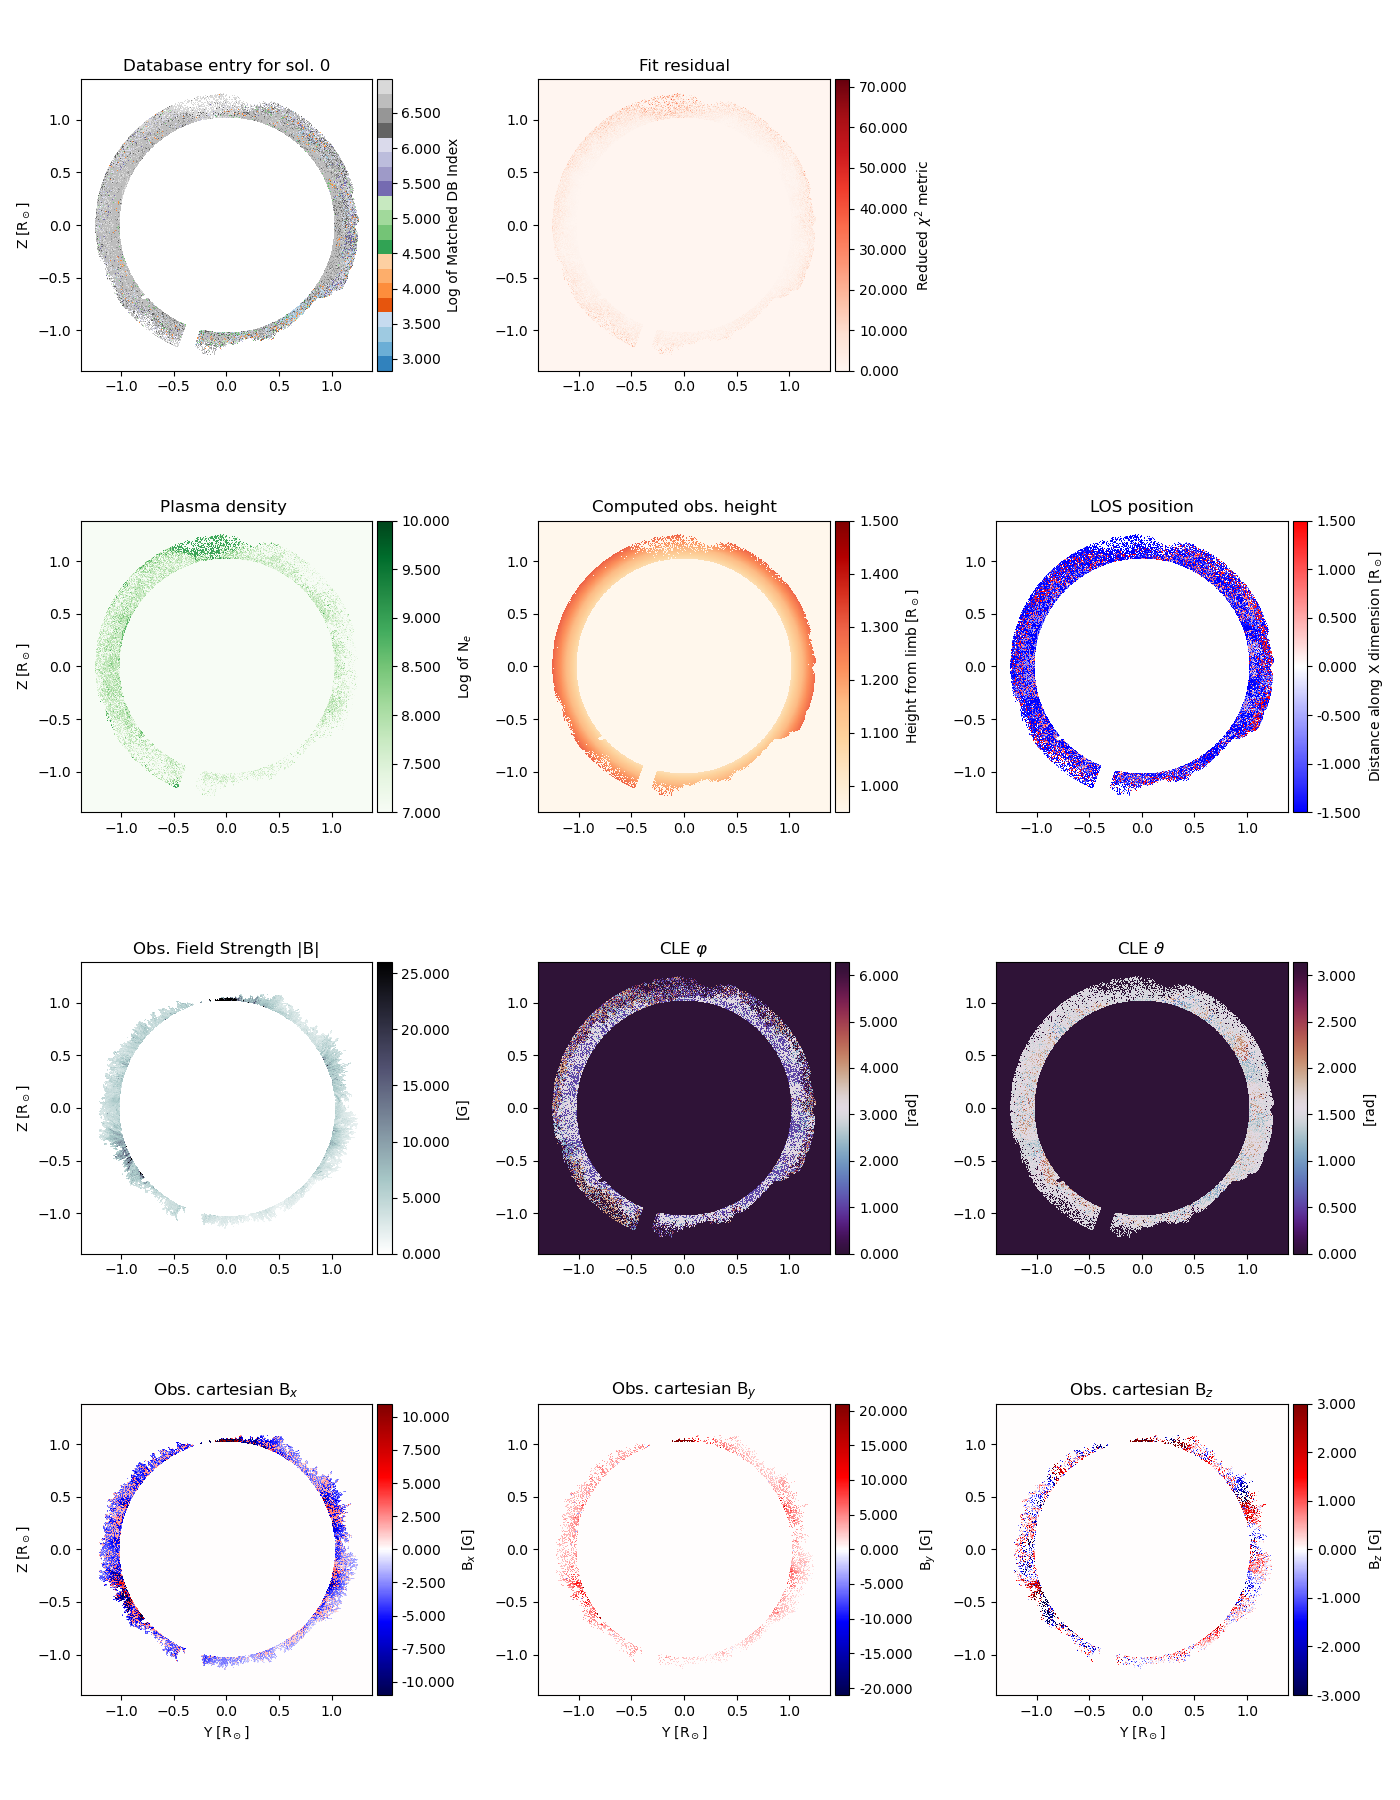

In [18]:
## Plot magnetic inversion

soln=0   ## selects the solution to plot < nsearch

fig, plots = plt.subplots(nrows=4, ncols=3, figsize=(14,18))

ab=plots[0,0].imshow(np.log10(invout[srx1:srx2,sry1:sry2,soln,0]),extent=rnge,cmap='tab20c',interpolation='none')
plots[0,0].set_title(f'Database entry for sol. {soln}')
colorbar(ab, title='Log of Matched DB Index')
plots[0,0].set_ylabel('Z [R$_\odot$]')

ab=plots[0,1].imshow(invout[srx1:srx2,sry1:sry2,soln,1],extent=rnge,cmap='Reds',interpolation='none')
plots[0,1].set_title('Fit residual')
colorbar(ab, title='Reduced $\chi^2$ metric')

plots[0, 2].axis('off') ###leave one empty panel

ab=plots[1,0].imshow(invout[srx1:srx2,sry1:sry2,soln,2],cmap='Greens',interpolation='none',extent=rnge,vmin=7,vmax=10)
plots[1,0].set_title('Plasma density ')
colorbar(ab, title='Log of N$_e$')
plots[1,0].set_ylabel('Z [R$_\odot$]')

ab=plots[1,1].imshow(invout[srx1:srx2,sry1:sry2,soln,3],extent=rnge,cmap='OrRd',interpolation='none',vmin=0.95,vmax=1.5)
plots[1,1].set_title('Computed obs. height')
colorbar(ab, title='Height from limb [R$_\odot$]')

ab=plots[1,2].imshow(invout[srx1:srx2,sry1:sry2,soln,4],extent=rnge,cmap='bwr',interpolation='none',vmin=-1.5,vmax=1.5)
plots[1,2].set_title('LOS position')
colorbar(ab, title='Distance along X dimension [R$_\odot$]')

mmscale=np.fix(np.abs(2*np.mean(invout[srx1:srx2,sry1:sry2,soln,5])))
ab=plots[2,0].imshow(invout[srx1:srx2,sry1:sry2,soln,5],extent=rnge,cmap='bone_r',interpolation='none',vmin=0,vmax=mmscale)
plots[2,0].set_title('Obs. Field Strength |B|')
colorbar(ab, title='[G]')
plots[2,0].set_ylabel('Z [R$_\odot$]')

ab=plots[2,1].imshow(invout[srx1:srx2,sry1:sry2,soln,6],extent=rnge,cmap='twilight_shifted',interpolation='none',vmin=0,vmax=6.28)
plots[2,1].set_title('CLE $\\varphi$')
colorbar(ab, title='[rad]')

ab=plots[2,2].imshow(invout[srx1:srx2,sry1:sry2,soln,7],extent=rnge,cmap='twilight_shifted',interpolation='none',vmin=0,vmax=3.14)
plots[2,2].set_title('CLE $\\vartheta$ ')
colorbar(ab, title='[rad]')


mmscale=np.fix(np.abs(2*np.mean(invout[srx1:srx2,sry1:sry2,soln,8])))
ab=plots[3,0].imshow(invout[srx1:srx2,sry1:sry2,soln,8],extent=rnge,cmap='seismic',interpolation='none',vmin=-mmscale,vmax=mmscale)
plots[3,0].set_title('Obs. cartesian B$_x$')
colorbar(ab, title='B$_x$ [G]')
plots[3,0].set_ylabel('Z [R$_\odot$]')
plots[3,0].set_xlabel('Y [R$_\odot$]')

mmscale=np.fix(np.abs(2*np.mean(invout[srx1:srx2,sry1:sry2,soln,9])))
ab=plots[3,1].imshow(invout[srx1:srx2,sry1:sry2,soln,9],extent=rnge,cmap='seismic',interpolation='none',vmin=-mmscale,vmax=mmscale)
plots[3,1].set_title('Obs. cartesian B$_y$')
colorbar(ab, title='B$_y$ [G]')
plots[3,1].set_xlabel('Y [R$_\odot$]')

mmscale=np.fix(np.abs(2*np.mean(invout[srx1:srx2,sry1:sry2,soln,10])))
ab=plots[3,2].imshow(invout[srx1:srx2,sry1:sry2,soln,10],extent=rnge,cmap='seismic',interpolation='none',vmin=-mmscale,vmax=mmscale)
plots[3,2].set_title('Obs. cartesian B$_z$')
colorbar(ab, title='B$_z$ [G]')
plots[3,2].set_xlabel('Y [R$_\odot$]')

plt.tight_layout()

### Save the putput plots
if not os.path.exists('./testrun_outputs'):              ## make an output directory to keep things clean
    os.makedirs('./testrun_outputs')
plt.savefig(f"./testrun_outputs/invout_2line__sol{soln}_{datestamp}.pdf")

In [ ]:
##Print pixelwise inversion solution in a human readable way

np.set_printoptions(linewidth=200,suppress=True)   ## Suppress can be set to true to disable exponential notation.
xx=391      ## x pixel position
yy=555      ## y pixel position

# print("||  DB Index    ||    chi^2    ||  ne density ||  y (height) || x(LOS pos.) ||      B      ||    varphi   ||  vartheta   ||     Bx      ||      By     ||     Bz       ||") ###for supress=False
print("||  DB Index         ||    chi^2    ||  ne density    ||  y (height)  ||   x(LOS pos.)   ||      B      ||    varphi      ||   vartheta     ||     Bx       ||      By      ||     Bz       ||") ###for supress=True
print(invout[xx,yy,:,:])